# Análisis de Datos con Python
### Ariel Palazzesi - 2025

#Consolidación de Datos

----

## Actividad 2: Análisis de Asistencia y Resultados en Talleres de Capacitación

---

### Objetivo:
- Cargar y combinar datos sobre la **asistencia a talleres**, los **participantes** y su **rendimiento**.  
- Limpiar y transformar los datos, asegurando su **integridad y aplicabilidad**.  
- Realizar un **análisis descriptivo** que resuma la participación y los resultados obtenidos.

### Contexto:
* Después de realizar un excelente trabajo en la primera actividad, ahora **Matías**, el Data Analyst en **SynthData**, te asignó una nueva tarea.  
Esta vez, vas a **analizar la participación y el rendimiento de los asistentes** en una serie de talleres de capacitación organizados por una **ONG asociada**.  
Tu trabajo es **evaluar la efectividad** de estos talleres y **ayudar a la organización** a tomar decisiones para futuras ediciones.

---

### Consigna:
1. Cargá los conjuntos de datos.  
2. Explorá cada DataFrame para familiarizarte con los datos.  
3. Limpiá los datos.  
4. Combiná los tres conjuntos en un único DataFrame utilizando las claves apropiadas.  
5. Calculá la **asistencia promedio por taller** y el **puntaje promedio por participante**,  
   visualizando los resultados en gráficos.


In [1]:
# ----------------------------------------------------
# 1) Importamos las librerías necesarias
# ----------------------------------------------------
import pandas as pd
import numpy as np

# ----------------------------------------------------
# 2) Cargamos los tres datasets
# ----------------------------------------------------
participantes = pd.read_csv("participantes.csv")
talleres = pd.read_csv("talleres.csv")
resultados = pd.read_csv("resultados_taller.csv")

# ----------------------------------------------------
# 3) Vista rápida de sus dimensiones
# ----------------------------------------------------
print("participantes......:", participantes.shape)
print("talleres...........:", talleres.shape)
print("resultados.........:", resultados.shape)


participantes......: (1014, 4)
talleres...........: (10, 2)
resultados.........: (1000, 4)


In [2]:
# ----------------------------------------------------
# 3) Exploramos cada DataFrame
# ----------------------------------------------------

def explorar(df, nombre):
    print()
    print("="*50)
    print(f"EXPLORACIÓN DE: {nombre.upper()}")
    print("="*50)

    # Tamaño y tipos de datos
    print("Shape (filas, columnas):", df.shape)
    print("\nTipos de datos:")
    print(df.dtypes)

    # Nulos y duplicados
    print()
    print("-"*40)
    print("Nulos por columna:")
    print("-"*40)
    print(df.isna().sum())
    print()
    print("Duplicados:", df.duplicated().sum())

    # Primeras filas
    print()
    print("-"*40)
    print("Primeras 5 filas:")
    print("-"*40)
    display(df.head())

    # Resumen numérico y categórico
    print()
    num = df.select_dtypes(include="number")
    if not num.empty:
        print("-"*40)
        print("Resumen numérico:")
        print("-"*40)
        display(num.describe().T)
    else:
        print("No hay columnas numéricas.")

    cat = df.select_dtypes(include="object")
    if not cat.empty:
        print("-"*40)
        print("Resumen categórico:")
        print("-"*40)
        display(cat.describe().T)
    else:
        print("No hay columnas categóricas.")

# ----------------------------------------------------
# Aplicamos la función a cada dataset
# ----------------------------------------------------
explorar(participantes, "participantes")
explorar(talleres, "talleres")
explorar(resultados, "resultados_taller")



EXPLORACIÓN DE: PARTICIPANTES
Shape (filas, columnas): (1014, 4)

Tipos de datos:
ID_Participante     int64
Nombre             object
Edad                int64
Ciudad             object
dtype: object

----------------------------------------
Nulos por columna:
----------------------------------------
ID_Participante    0
Nombre             0
Edad               0
Ciudad             0
dtype: int64

Duplicados: 14

----------------------------------------
Primeras 5 filas:
----------------------------------------


,ID_Participante,Nombre,Edad,Ciudad
0,408,Jackquelin Gonzalo,34,Avellaneda
1,203,Natassia Endon,35,San Fernando
2,55,Daloris Fruser,40,Berisso
3,296,Addy Lorant,29,Tigre
4,427,Laurens Gladdor,33,Punta Lara



----------------------------------------
Resumen numérico:
----------------------------------------


,count,mean,std,min,25%,50%,75%,max
ID_Participante,1014.0,502.006903,288.727601,1.0,252.25,503.5,751.75,1000.0
Edad,1014.0,33.571992,4.812603,19.0,30.00,34.0,37.00,48.0


----------------------------------------
Resumen categórico:
----------------------------------------


,count,unique,top,freq
Nombre,1014,1000,Beret Saura,2
Ciudad,1014,37,Quilmes,51



EXPLORACIÓN DE: TALLERES
Shape (filas, columnas): (10, 2)

Tipos de datos:
ID_Taller         int64
Nombre_Taller    object
dtype: object

----------------------------------------
Nulos por columna:
----------------------------------------
ID_Taller        0
Nombre_Taller    0
dtype: int64

Duplicados: 0

----------------------------------------
Primeras 5 filas:
----------------------------------------


,ID_Taller,Nombre_Taller
0,1,Introducción al Análisis de Datos con Excel
1,2,Visualización de Datos con Power BI
2,3,Estadística para Análisis de Datos
3,4,Python para Análisis de Datos
4,5,Análisis de Datos con R



----------------------------------------
Resumen numérico:
----------------------------------------


,count,mean,std,min,25%,50%,75%,max
ID_Taller,10.0,5.5,3.02765,1.0,3.25,5.5,7.75,10.0


----------------------------------------
Resumen categórico:
----------------------------------------


,count,unique,top,freq
Nombre_Taller,10,10,Introducción al Análisis de Datos con Excel,1



EXPLORACIÓN DE: RESULTADOS_TALLER
Shape (filas, columnas): (1000, 4)

Tipos de datos:
ID_Taller            int64
ID_Participante      int64
Asistió               bool
Puntaje            float64
dtype: object

----------------------------------------
Nulos por columna:
----------------------------------------
ID_Taller          0
ID_Participante    0
Asistió            0
Puntaje            4
dtype: int64

Duplicados: 0

----------------------------------------
Primeras 5 filas:
----------------------------------------


,ID_Taller,ID_Participante,Asistió,Puntaje
0,5,35,False,4.36
1,9,989,True,3.48
2,6,636,True,8.15
3,2,742,True,6.85
4,10,170,True,4.51



----------------------------------------
Resumen numérico:
----------------------------------------


,count,mean,std,min,25%,50%,75%,max
ID_Taller,1000.0,5.500000,2.873719,1.00,3.0000,5.50,8.00,10.00
ID_Participante,1000.0,500.500000,288.819436,1.00,250.7500,500.50,750.25,1000.00
Puntaje,996.0,5.969247,1.480333,0.83,4.9475,5.98,6.94,10.55


No hay columnas categóricas.


In [3]:
# ----------------------------------------------------
# 4) Limpieza de datos
# ----------------------------------------------------
import pandas as pd
import numpy as np

# -----------------------------
# 4.1) PARTICIPANTES
# -----------------------------
print("="*50)
print("LIMPIEZA: PARTICIPANTES")

antes_p = participantes.shape
dups_p  = participantes.duplicated().sum()
print("Antes -> shape:", antes_p, "| duplicados:", dups_p)

# Normalización de texto (opcional)
for c in ["Nombre", "Ciudad"]:
    if c in participantes.columns:
        participantes[c] = participantes[c].astype("string").str.strip()

# Eliminamos duplicados exactos
participantes = participantes.drop_duplicates().copy()

print("Después -> shape:", participantes.shape, "| duplicados:", participantes.duplicated().sum())
display(participantes.head(3))


# -----------------------------
# 4.2) TALLERES
# -----------------------------
print("="*50)
print("LIMPIEZA: TALLERES")

antes_t = talleres.shape
dups_t  = talleres.duplicated().sum()
print("Antes -> shape:", antes_t, "| duplicados:", dups_t)

# Normalización de texto (opcional)
talleres["Nombre_Taller"] = talleres["Nombre_Taller"].astype("string").str.strip()

# Eliminamos duplicados exactos
talleres = talleres.drop_duplicates().copy()

print("Después -> shape:", talleres.shape, "| duplicados:", talleres.duplicated().sum())
display(talleres.head(3))


# -----------------------------
# 4.3) RESULTADOS (asistencia y puntajes)
# -----------------------------
print("="*50)
print("LIMPIEZA: RESULTADOS_TALLER")

antes_r = resultados.shape
dups_r  = resultados.duplicated().sum()
nulos_puntaje = resultados["Puntaje"].isna().sum()
print("Antes -> shape:", antes_r, "| duplicados:", dups_r, "| nulos Puntaje:", nulos_puntaje)

# Tipos esperados (por claridad)
resultados["Asistió"] = resultados["Asistió"].astype(bool)
resultados["Puntaje"] = pd.to_numeric(resultados["Puntaje"], errors="coerce")

# Nota: conservamos NaN de 'Puntaje' (se excluyen al calcular promedios)
# Eliminamos duplicados exactos
resultados = resultados.drop_duplicates().copy()

print("Después -> shape:", resultados.shape, "| duplicados:", resultados.duplicated().sum(),
      "| nulos Puntaje:", resultados["Puntaje"].isna().sum())
display(resultados.head(3))


LIMPIEZA: PARTICIPANTES
Antes -> shape: (1014, 4) | duplicados: 14
Después -> shape: (1000, 4) | duplicados: 0


,ID_Participante,Nombre,Edad,Ciudad
0,408,Jackquelin Gonzalo,34,Avellaneda
1,203,Natassia Endon,35,San Fernando
2,55,Daloris Fruser,40,Berisso


LIMPIEZA: TALLERES
Antes -> shape: (10, 2) | duplicados: 0
Después -> shape: (10, 2) | duplicados: 0


,ID_Taller,Nombre_Taller
0,1,Introducción al Análisis de Datos con Excel
1,2,Visualización de Datos con Power BI
2,3,Estadística para Análisis de Datos


LIMPIEZA: RESULTADOS_TALLER
Antes -> shape: (1000, 4) | duplicados: 0 | nulos Puntaje: 4
Después -> shape: (1000, 4) | duplicados: 0 | nulos Puntaje: 4


,ID_Taller,ID_Participante,Asistió,Puntaje
0,5,35,False,4.36
1,9,989,True,3.48
2,6,636,True,8.15


In [4]:
# ----------------------------------------------------
# 5) Combinación de datasets (resultado + participantes + talleres)
#   - Claves:
#     resultados.ID_Participante <-> participantes.ID_Participante  (N:1)
#     resultados.ID_Taller       <-> talleres.ID_Taller             (N:1)
# ----------------------------------------------------

# Merge resultados <-> participantes
res_part = resultados.merge(
    participantes,
    on="ID_Participante",
    how="left",
    validate="many_to_one"   # muchos resultados por participante
)

# Merge anterior <-> talleres
df_comb = res_part.merge(
    talleres,
    on="ID_Taller",
    how="left",
    validate="many_to_one"   # muchos resultados por taller único
)

print("df_comb (combinado) -> shape:", df_comb.shape)
display(df_comb.head(3))

# ----------------------------------------------------
# 5.1) Asistencia promedio por taller
#     - Interpreta True/False como 1/0 y obtiene el promedio (tasa de asistencia)
#     - También muestra cantidad de registros y cantidad de asistentes
# ----------------------------------------------------
asistencia_por_taller = (
    df_comb
    .groupby(["ID_Taller", "Nombre_Taller"], as_index=False)
    .agg(
        Registros=("ID_Participante", "count"),
        Asistentes=("Asistió", "sum"),
        Tasa_Asistencia=("Asistió", "mean")
    )
    .sort_values("Tasa_Asistencia", ascending=False, ignore_index=True)
)

# Redondeo
asistencia_por_taller["Tasa_Asistencia"] = (asistencia_por_taller["Tasa_Asistencia"] * 100).round(2)

print("\n" + "-"*40)
print("Asistencia promedio por taller (%)")
print("-"*40)
display(asistencia_por_taller)

# ----------------------------------------------------
# 5.2) Puntaje promedio por participante
#     - Promedio de 'Puntaje' ignorando NaN (comportamiento por defecto)
#     - Incluye cantidad de evaluaciones con puntaje no nulo
# ----------------------------------------------------
puntaje_por_participante = (
    df_comb
    .groupby(["ID_Participante", "Nombre", "Ciudad", "Edad"], as_index=False)
    .agg(
        Evaluaciones=("Puntaje", "count"),     # solo cuenta no-nulos
        Puntaje_Promedio=("Puntaje", "mean")
    )
    .sort_values("Puntaje_Promedio", ascending=False, ignore_index=True)
)

puntaje_por_participante["Puntaje_Promedio"] = puntaje_por_participante["Puntaje_Promedio"].round(2)

print("\n" + "-"*40)
print("Puntaje promedio por participante (solo no nulos)")
print("-"*40)
display(puntaje_por_participante.head(10))


df_comb (combinado) -> shape: (1000, 8)


,ID_Taller,ID_Participante,Asistió,Puntaje,Nombre,Edad,Ciudad,Nombre_Taller
0,5,35,False,4.36,Constantia Woodrup,32,San Fernando,Análisis de Datos con R
1,9,989,True,3.48,Garold Gregoriou,28,Merlo,Análisis Predictivo y Modelado Estadístico
2,6,636,True,8.15,Reggi Upward,32,La Matanza,Minería de Datos y Machine Learning



----------------------------------------
Asistencia promedio por taller (%)
----------------------------------------


,ID_Taller,Nombre_Taller,Registros,Asistentes,Tasa_Asistencia
0,10,Data Science para No Científicos,100,96,96.0
1,2,Visualización de Datos con Power BI,100,94,94.0
2,6,Minería de Datos y Machine Learning,100,94,94.0
3,1,Introducción al Análisis de Datos con Excel,100,93,93.0
4,8,Big Data y Procesamiento de Datos,100,93,93.0
5,9,Análisis Predictivo y Modelado Estadístico,100,93,93.0
6,4,Python para Análisis de Datos,100,92,92.0
7,5,Análisis de Datos con R,100,91,91.0
8,3,Estadística para Análisis de Datos,100,90,90.0
9,7,Análisis de Datos en SQL,100,89,89.0



----------------------------------------
Puntaje promedio por participante (solo no nulos)
----------------------------------------


,ID_Participante,Nombre,Ciudad,Edad,Evaluaciones,Puntaje_Promedio
0,661,Trumaine Scandrett,San Fernando,29,1,10.55
1,544,Phyllida Riccione,Avellaneda,41,1,9.90
2,94,Gustave Brader,Marcos Paz,29,1,9.87
3,535,Julio Radenhurst,Pilar,35,1,9.85
4,596,Araldo Belford,Lomas de Zamora,27,1,9.82
5,208,Ede Dust,Esteban Echeverría,27,1,9.79
6,405,Lacie Doge,Lomas de Zamora,32,1,9.58
7,872,Leland Roj,Berazategui,27,1,9.52
8,572,Dane Barde,Hurlingham,35,1,9.50
9,465,Nickolas Farrand,Lomas de Zamora,34,1,9.48


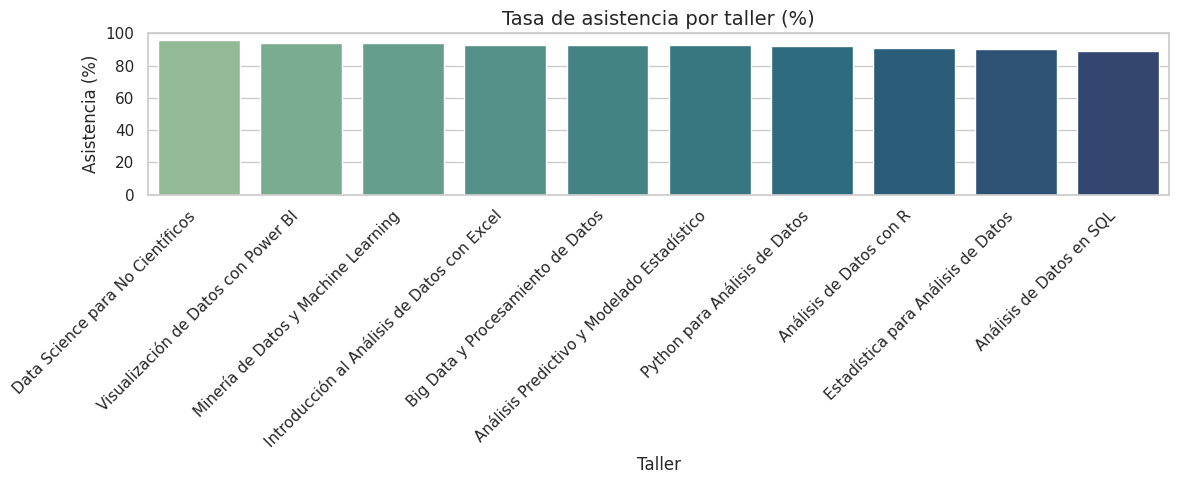

In [5]:
# ----------------------------------------------------
# 6) Visualización: Tasa de asistencia por taller (%)
# ----------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenamos de mayor a menor
tabla_asist = asistencia_por_taller.sort_values("Tasa_Asistencia", ascending=False)

# Configuramos estilo visual
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 5))
grafico = sns.barplot(
    data=tabla_asist,
    x="Nombre_Taller",
    y="Tasa_Asistencia",
    hue="Nombre_Taller",
    palette="crest"
)

# Títulos y ejes
plt.title("Tasa de asistencia por taller (%)", fontsize=14)
plt.xlabel("Taller", fontsize=12)
plt.ylabel("Asistencia (%)", fontsize=12)
plt.ylim(0, 100)
plt.xticks(rotation=45, ha="right")



plt.tight_layout()
plt.show()


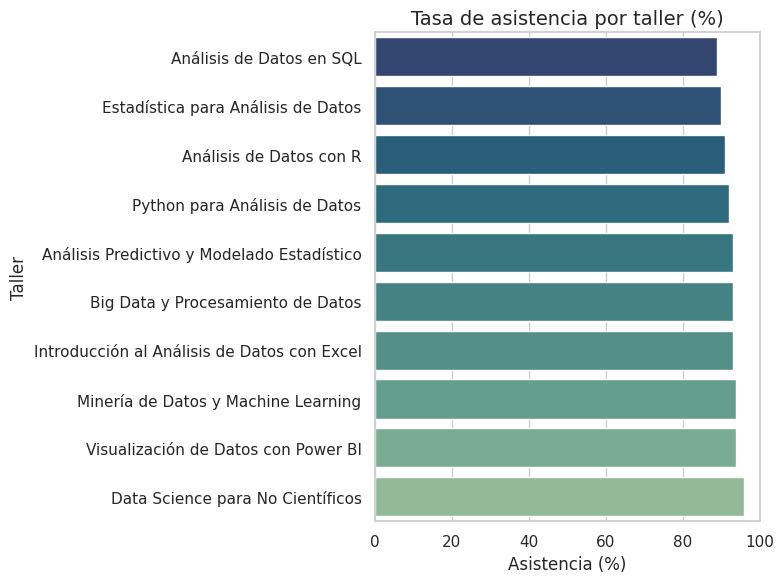

In [6]:
# ----------------------------------------------------
# 6-bis) Versión horizontal: Tasa de asistencia por taller
# ----------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenamos de mayor a menor para una lectura más clara
tabla_asist = asistencia_por_taller.sort_values("Tasa_Asistencia", ascending=False)

# Configuramos el estilo
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))
grafico = sns.barplot(
    data=tabla_asist,
    y="Nombre_Taller",
    x="Tasa_Asistencia",
    hue="Nombre_Taller",
    palette="crest",
    orient="h",   # horizontal
    legend=False  # desactiva la leyenda
)

# Títulos y ejes
plt.title("Tasa de asistencia por taller (%)", fontsize=14)
plt.xlabel("Asistencia (%)", fontsize=12)
plt.ylabel("Taller", fontsize=12)

# Eje truncado para resaltar diferencias
plt.xlim(0, 100)

# Invertimos el eje Y para que el taller con mayor asistencia quede arriba
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()



### Visualizar el puntaje promedio obtenido por los participantes.

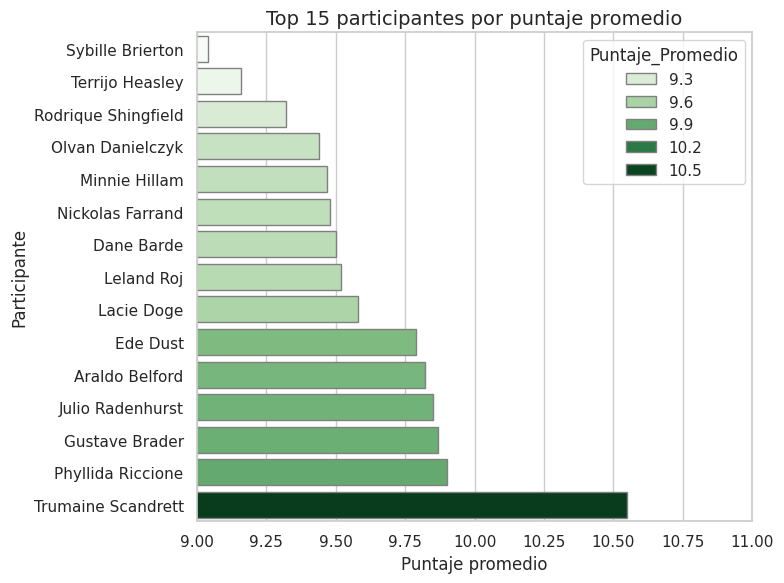

In [7]:
# ----------------------------------------------------
# Top 15 participantes por puntaje promedio
# ----------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Tomamos los 15 participantes con mayor puntaje promedio
top_puntajes = puntaje_por_participante.nlargest(15, "Puntaje_Promedio")

# Estilo visual
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))
grafico = sns.barplot(
    data=top_puntajes,
    y="Nombre",
    x="Puntaje_Promedio",
    palette="Greens", # Paleta
    orient="h",       # Orientacion
    edgecolor="gray", # Bordes
    hue="Puntaje_Promedio"
)

# Títulos y ejes
plt.title("Top 15 participantes por puntaje promedio", fontsize=14)
plt.xlabel("Puntaje promedio", fontsize=12)
plt.ylabel("Participante", fontsize=12)
plt.xlim(9, 11)

# Etiquetas numéricas al final de cada barra
#for index, row in top_puntajes.iterrows():
#    grafico.text(
#        row["Puntaje_Promedio"] + 0.1,  # leve desplazamiento a la derecha
#        index,
#        f"{row['Puntaje_Promedio']:.2f}",
#        va="center", fontsize=9
#    )

# Invertimos eje Y (para que el de mayor puntaje quede arriba)
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()



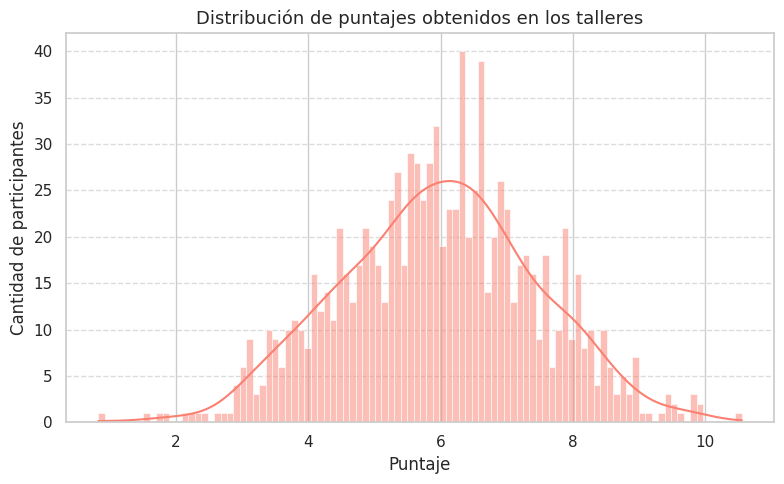

In [8]:
# ----------------------------------------------------
# 8) Distribución de puntajes (histograma con Seaborn)
# ----------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Quitamos los valores nulos
puntajes = df_comb["Puntaje"].dropna()

# Estilo general
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.histplot(
    data=puntajes,
    bins=100,               # cantidad de intervalos
    color="salmon",         # color de relleno
    edgecolor="white",      # color del borde de las barras
    kde=True                # ostrar curva de densidad
)

# Títulos y etiquetas
plt.title("Distribución de puntajes obtenidos en los talleres", fontsize=13)
plt.xlabel("Puntaje", fontsize=12)
plt.ylabel("Cantidad de participantes", fontsize=12)

# Cuadrícula y formato
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



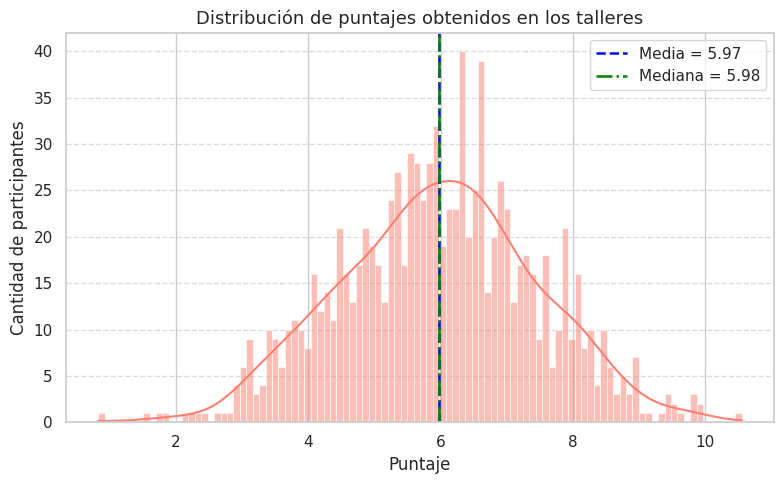

In [9]:
# ----------------------------------------------------
# 9) Distribución de puntajes con media y mediana
# ----------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Quitamos los valores nulos
puntajes = df_comb["Puntaje"].dropna()

# Calculamos media y mediana
media = puntajes.mean()
mediana = puntajes.median()

# Estilo general
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.histplot(
    data=puntajes,
    bins=100,
    color="salmon",
    edgecolor="white",
    kde=True
)

# Líneas de referencia con plt.axvline
# sintaxis: plt.axvline(x, color, linestyle, linewidth, label)
plt.axvline(media, color="blue", linestyle="--", linewidth=1.8, label=f"Media = {media:.2f}")
plt.axvline(mediana, color="green", linestyle="-.", linewidth=1.8, label=f"Mediana = {mediana:.2f}")

# Títulos y etiquetas
plt.title("Distribución de puntajes obtenidos en los talleres", fontsize=13)
plt.xlabel("Puntaje", fontsize=12)
plt.ylabel("Cantidad de participantes", fontsize=12)

# Cuadrícula y formato
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()  # muestra las etiquetas de las líneas
plt.tight_layout()
plt.show()

